In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import mglearn
import pandas as pd
import numpy as np
from matplotlib import rc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# 한글 처리를 위해 폰트 설정
rc('font', family='AppleGothic')
# 음수 부호가 깨지지 않도록 설정
plt.rcParams['axes.unicode_minus'] = False

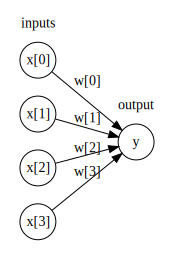

In [2]:
import os

# 환경변수 path에 graph viz의 실행 파일 디렉토리를 추가
os.environ["PATH"] +=\
os.pathsep + "/usr/local/bin"

# mglearn 패키지의 플로팅 기능으로 로지스틱 회귀분석 그래프 출력
mglearn.plots.plot_logistic_regression_graph()

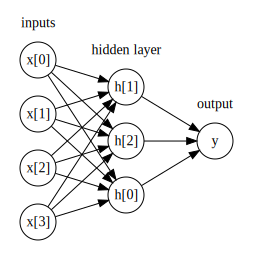

In [3]:
# 은닉층 1개를 가지는 인공신경망 그래프
mglearn.plots.plot_single_hidden_layer_graph()

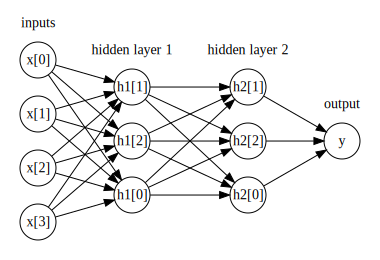

In [4]:
# 은닉층 2개를 가지는 인공신경망 그래프
mglearn.plots.plot_two_hidden_layer_graph()

In [5]:
# 사이킷런 패키지의 인공신경망 함수 로딩
from sklearn.neural_network import MLPClassifier
# 임의의 데이터셋
from sklearn.datasets import make_moons

# noise 표준편차, n_samples 샘플 갯수
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
print(X)
print(y)

[[ 1.87756309  0.56839425]
 [ 0.36877983 -0.34894509]
 [ 0.96515318  0.10921819]
 [ 0.48599685  0.20291313]
 [ 1.72532644  0.53367598]
 [ 1.47976586  0.08726406]
 [ 2.11889248  0.60498388]
 [-0.74017805  0.49615542]
 [-0.38099245  1.34740194]
 [ 0.22944941  0.87981305]
 [ 1.31311917 -0.69665985]
 [ 0.87435391  0.83750547]
 [ 0.77145295 -0.69709227]
 [ 1.26285558  0.12916271]
 [-0.71988634  0.69106791]
 [ 0.79205253 -0.40516241]
 [ 1.31886119 -0.41396289]
 [ 0.26579093  0.78151982]
 [ 0.08686038  0.49400243]
 [-0.74872343 -0.06972957]
 [ 0.88404174 -0.35425773]
 [ 1.02671711  0.73292915]
 [ 0.73867317  0.30808589]
 [ 1.12856036  0.33191968]
 [ 1.15536561 -0.50593577]
 [ 1.56825139 -0.05911358]
 [ 0.29004812  1.00820293]
 [ 0.64076308 -0.19860992]
 [-1.20034998  0.46412528]
 [-0.16955317  0.60660877]
 [-0.53369875  0.50244086]
 [ 1.00549331  0.38686701]
 [ 0.65294065  0.80929512]
 [-0.56688607  0.73004641]
 [ 1.71942343  0.32909081]
 [ 0.96514959  0.51823046]
 [ 0.2683596  -0.11030872]
 

In [6]:
# 테스트 데이터 사이즈 20%
# random_state : 매번 동일한 샘플이 테스트 데이터로 분리되도록 함
# stratify = y : 학습용 데이터와 테스트용 데이터에서 각각의 타겟값들이 동일한 비율로 나타나도록 함
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(len(X_train), len(X_test))

80 20


학습용 점수: 1.00
검증용 점수: 0.90


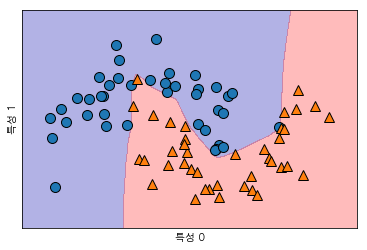

In [7]:
# 학습용 데이터로 인공신경망 학습
# lbfgs 최적화 알고리즘의 종류
# 기본 hidden layer 유닛은 100개
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
# 산점도 출력
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
# 기본값으로 은닉유닛 100개 사용
# 데이터가 매우 적은 상태이므로 100개를 쓰는 것보다는 줄이는 것이 좋다.
# 은닉층을 줄이면 모델의 복잡도는 낮아진다.
print("학습용 점수: {:.2f}".format(mlp.score(X_train, y_train)))
print("검증용 점수: {:.2f}".format(mlp.score(X_test, y_test)))
# 과적합화

학습용 점수: 0.90
검증용 점수: 0.85


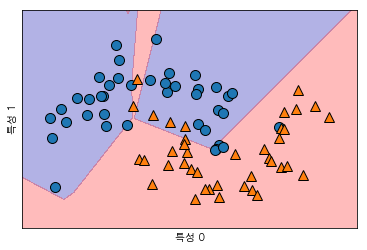

In [8]:
# hidden layer의 유닛을 10개로 줄이고 테스트
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("학습용 점수: {:.2f}".format(mlp.score(X_train, y_train)))
print("검증용 점수: {:.2f}".format(mlp.score(X_test, y_test)))

학습용 점수: 1.00
검증용 점수: 0.90


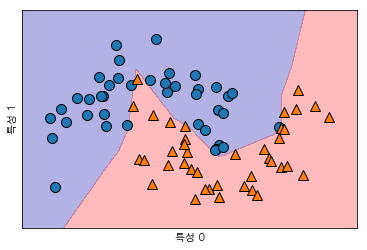

In [9]:
# 10개의 유닛으로 된 두 개의 은닉층 [10, 10]
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("학습용 점수: {:.2f}".format(mlp.score(X_train, y_train)))
print("검증용 점수: {:.2f}".format(mlp.score(X_test, y_test)))

In [10]:
# cancer 데이터셋에 적용
from sklearn.datasets import load_breast_cancer
# 데이터셋 로딩
cancer = load_breast_cancer()
# 변수 확인
print("cancer.keys() : {}".format(cancer.keys()))
# 데이터셋에 대한 설명
print(cancer.DESCR)

cancer.keys() : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were

In [11]:
# 569개의 데이터, 특성 30개
print("데이터의 형태: {}".format(cancer.data.shape))

데이터의 형태: (569, 30)


In [12]:
# 데이터셋을 판다스의 데이터프레임으로 변환
df = pd.DataFrame(cancer.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df.columns = cancer.feature_names
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df['result'] = cancer.target
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [15]:
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

In [16]:
# 악성 212개, 양성 357개
print("클래스별 샘플 갯수:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 갯수:
{'malignant': 212, 'benign': 357}


In [17]:
# test_size를 생략하면 75:25로 나눔
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
print(len(X_train), len(X_test))
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("학습용 점수: {:.2f}".format(mlp.score(X_train, y_train)))
print("검증용 점수: {:.2f}".format(mlp.score(X_test, y_test)))

426 143
학습용 점수: 0.94
검증용 점수: 0.92


In [18]:
# 데이터 전처리 0.0 ~ 1.0
# 학습용 각 특성의 평균을 계산
mean_on_train = X_train.mean(axis=0)
# 학습용 각 특성의 표준 편차 계산
std_on_train = X_train.std(axis=0)
# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준편차 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

# 데이터셋을 판다스의 데이터프레임으로 변환
df2 = pd.DataFrame(X_train_scaled, y_train)
print(df2.head())

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("학습용 점수: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("검증용 점수: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
# 최대 반복 횟수에 도달했다는 경고 : max_iter 반복횟수를 늘려야 함
# 성능이 많이 향상됨

         0         1         2         3         4         5         6   \
1 -0.650799 -0.430573 -0.680248 -0.626983 -0.913819 -0.933352 -0.787631   
1 -0.828353  0.152265 -0.827738 -0.753094  0.652812 -0.708753 -1.066546   
0  1.682772  2.189772  1.600098  1.673839  0.103624 -0.005326  0.705766   
1 -0.160411 -0.338290 -0.241878 -0.239207 -1.220208 -1.247434 -0.875740   
0  0.713269  0.234834  0.612740  0.553289 -1.546108 -0.642973 -0.665094   

         7         8         9     ...           20        21        22  \
1 -0.679444  0.254041 -0.798772    ...    -0.666144  0.018492 -0.681179   
1 -1.071909  0.489037 -0.341454    ...    -0.887045  0.023445 -0.900486   
0  1.257731 -0.190645 -1.064688    ...     1.508098  2.082033  1.401345   
1 -0.948189 -0.837790 -1.083682    ...    -0.167070  0.076272 -0.252000   
0 -0.672481  0.149196 -1.368593    ...     0.585631  0.152210  0.584842   

         23        24        25        26        27        28        29  
1 -0.631501  0.191962 -0

/Users/kyeongmin/anaconda3/envs/django/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [19]:
# 반복횟수 max_iter를 1000으로 늘림
mlp = MLPClassifier(max_iter = 1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("학습용 점수: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("검증용 점수: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

학습용 점수: 1.000
검증용 점수: 0.972


In [20]:
# 일반화 성능을 더 올리기 위해 모델의 복잡도를 낮춤
# 강하게 규제하기 위해 alpha 값을 0.0001에서 1로 아주 크게 증가시킴
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("학습용 점수: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("검증용 점수: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

학습용 점수: 0.988
검증용 점수: 0.972
